In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.table import Table
from astropy.stats import LombScargle
import exoplanet as xo

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})



# Initial Run

In [3]:
# AU Mic == TIC 441420236
file = 'tess2018206045859-s0001-0000000441420236-0120-s_lc.fits'
tbl = Table.read(file, format='fits')

AOK = (tbl['QUALITY'] == 0) & np.isfinite(tbl['PDCSAP_FLUX'])

df_tbl = tbl.to_pandas()
smo = df_tbl['PDCSAP_FLUX'][AOK].rolling(128, center=True).median()

med = np.nanmedian(df_tbl['PDCSAP_FLUX'][AOK])



In [4]:

mcmc = pd.read_table('aumic_mcmc.txt', delim_whitespace=True, 
                     names=('walk','accept','step','chi','rad1','lat1','lon1', 'rad2','lat2','lon2','bright'))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'rad')

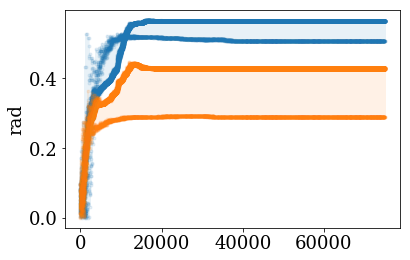

In [5]:
plt.plot(mcmc['rad1'], marker='.', linestyle=None, alpha=0.1)
plt.plot(mcmc['rad2'], marker='.', linestyle=None, alpha=0.1)
plt.ylabel('rad')

Text(0.5, 0, 'rad')

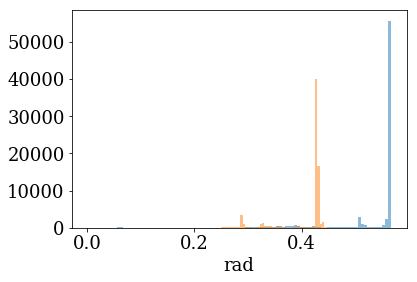

In [6]:
_ = plt.hist(mcmc['rad1'],bins=100,alpha=0.5)
_ = plt.hist(mcmc['rad2'],bins=100,alpha=0.5)
plt.xlabel('rad')

Text(0, 0.5, 'lat')

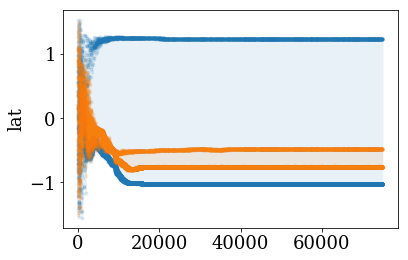

In [7]:
plt.plot(mcmc['lat1']-np.pi/2, marker='.', linestyle=None, alpha=0.1)
plt.plot(mcmc['lat2']-np.pi/2, marker='.', linestyle=None, alpha=0.1)
plt.ylabel('lat')

Text(0.5, 0, 'lat')

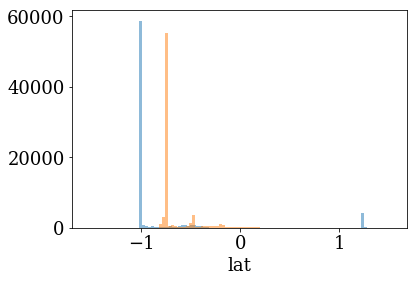

In [8]:
_ = plt.hist(mcmc['lat1']-np.pi/2,bins=100,alpha=0.5)
_ = plt.hist(mcmc['lat2']-np.pi/2,bins=100,alpha=0.5)
plt.xlabel('lat')

Text(0, 0.5, 'lon')

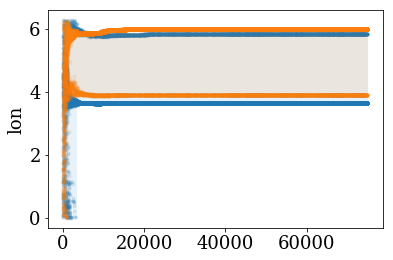

In [9]:
plt.plot(mcmc['lon1'], marker='.', linestyle=None, alpha=0.1)
plt.plot(mcmc['lon2'], marker='.', linestyle=None, alpha=0.1)
plt.ylabel('lon')

Text(0.5, 0, 'lon')

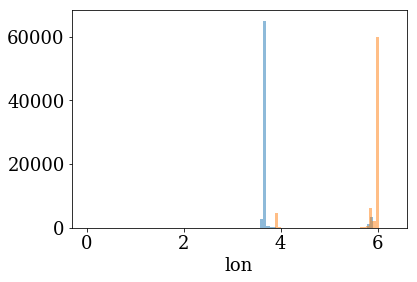

In [10]:
_ = plt.hist(mcmc['lon1'],bins=100,alpha=0.5)
_ = plt.hist(mcmc['lon2'],bins=100,alpha=0.5)
plt.xlabel('lon')

In [11]:
lcbest = pd.read_table('aumic_lcbest.txt', delim_whitespace=True, 
                     names=('time', 'flux','err','model','f1','f2','snum'))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


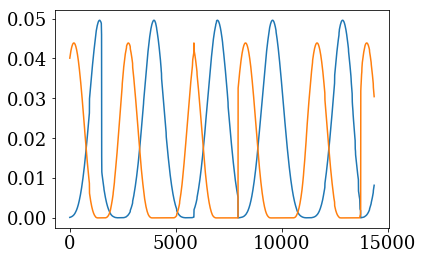

In [12]:
plt.plot(lcbest['f1'])
plt.plot(lcbest['f2'])

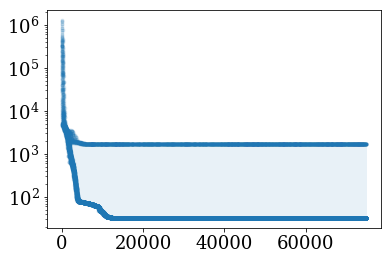

In [13]:
plt.plot(mcmc['chi'] / np.size(lcbest['f1']), marker='.', alpha=0.1)
plt.yscale("log")

(1000.0, 10)

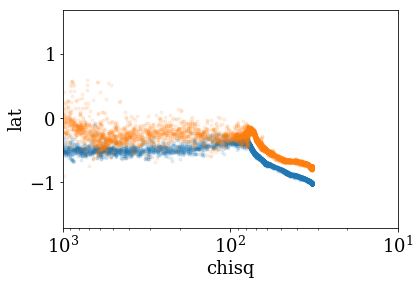

In [14]:
plt.plot(mcmc['chi']/ np.size(lcbest['f1']), mcmc['lat1']-np.pi/2, marker='.', linestyle='none', alpha=0.1)
plt.plot(mcmc['chi']/ np.size(lcbest['f1']), mcmc['lat2']-np.pi/2, marker='.', linestyle='none', alpha=0.1)

plt.xscale("log")
plt.xlabel('chisq')
plt.ylabel('lat')
plt.gca().invert_xaxis()
plt.xlim(1e3,10)

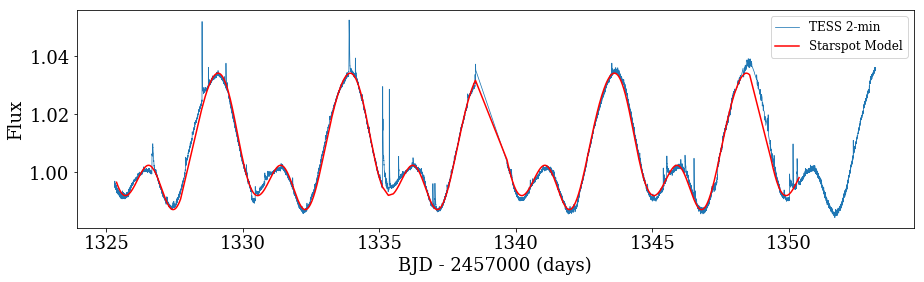

In [15]:
plt.figure(figsize=(15,4))
plt.plot(tbl['TIME'][AOK], tbl['PDCSAP_FLUX'][AOK]/med, lw=0.75, label='TESS 2-min', rasterized=True)
plt.ylabel('Flux');
plt.xlabel('BJD - 2457000 (days)');

plt.plot(lcbest['time'], lcbest['model'], c='r', label='Starspot Model', rasterized=True)
plt.legend(fontsize=12)
# plt.savefig('lc_model.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

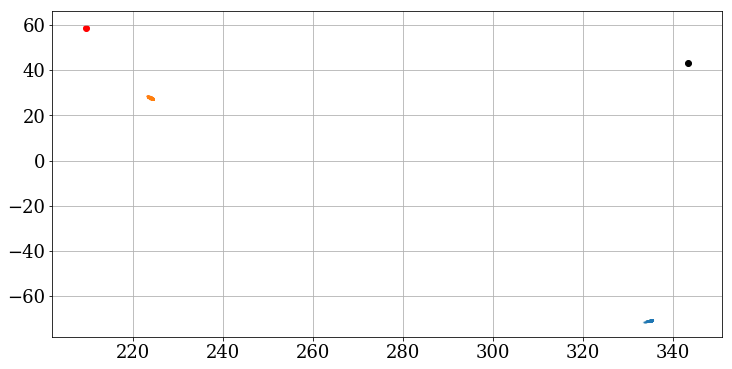

In [16]:
ok = np.where((mcmc['step'] > 1500))[0]

plt.figure(figsize=(12,6))
# ax=plt.subplot(111, projection="aitoff",)

plt.scatter(mcmc['lon1'][ok]* 180/np.pi, 90-(mcmc['lat1'][ok])* 180/np.pi, marker='o', alpha=0.1, s=1, rasterized=True)
plt.scatter(mcmc['lon2'][ok]* 180/np.pi, 90-(mcmc['lat2'][ok])* 180/np.pi, marker='o', alpha=0.1, s=1, rasterized=True)


plt.scatter(209.565806, 90-31.484912, c='r')
plt.scatter(343.430354, 90-46.778680, c='k')

plt.grid(True)


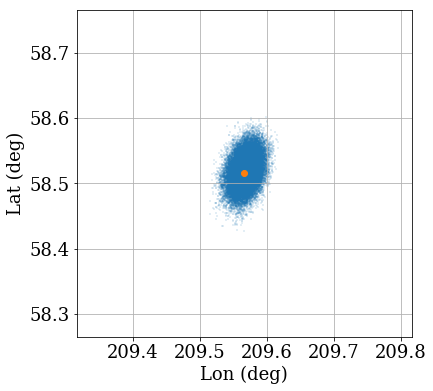

In [17]:
ds = 0.25

plt.figure(figsize=(6,6))
plt.scatter(mcmc['lon1'][ok]* 180/np.pi, 90-(mcmc['lat1'][ok])* 180/np.pi, marker=',', alpha=0.1, s=1, rasterized=True)

plt.scatter(209.565806, 90-31.484912, c='C1', rasterized=True)

plt.xlim(209.565806-ds, 209.565806+ds)
plt.ylim(90-31.484912-ds, 90-31.484912+ds)
plt.xlabel('Lon (deg)')
plt.ylabel('Lat (deg)')
plt.grid(True)

# plt.savefig('spot1.pdf', dpi=450, bbox_inches='tight', pad_inches=0.25, rasterized=True)

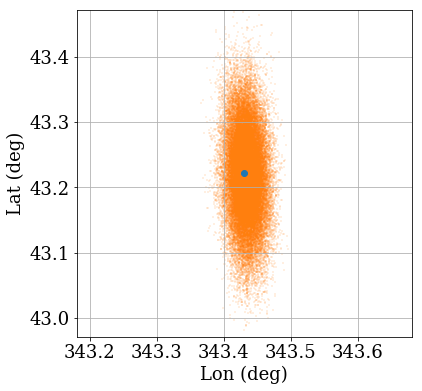

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(mcmc['lon2'][ok]* 180/np.pi, 90-(mcmc['lat2'][ok])* 180/np.pi, marker=',', alpha=0.1, s=1, c='C1', rasterized=True)

plt.scatter(343.430354, 90-46.778680, c='C0', rasterized=True)
 
plt.xlim(343.430354-ds, 343.430354+ds)
plt.ylim(90-46.778680-ds, 90-46.778680+ds)
plt.xlabel('Lon (deg)')
plt.ylabel('Lat (deg)')
plt.grid(True)

# plt.savefig('spot2.pdf', dpi=450, bbox_inches='tight', pad_inches=0.25, rasterized=True)

# Explore Inclination
Did a few, and longer, MCMC runs with STSP

In [56]:
inclin = np.array([0., 15, 30, 45, 60], dtype='float')
chi = np.zeros_like(inclin)
for k in range(5):
    chi[k] = pd.read_csv('aumic'+str(k)+'_parambest.txt', 
                         delim_whitespace=True, names=('c','x'))['c'][7]

[32.36190885 31.35855801 32.24411651 35.21893327 48.22289245]


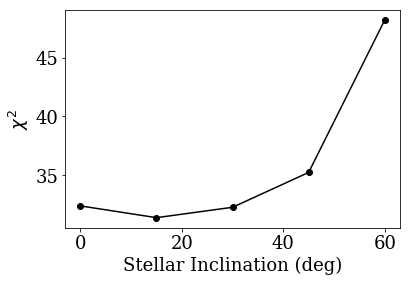

In [77]:
plt.plot(inclin, chi / np.float(len(lcbest)), '-o', c='k')
plt.xlabel('Stellar Inclination (deg)')
plt.ylabel('$\chi^2$')

print(chi / np.float(len(lcbest)))

plt.savefig('chisq_incl.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [78]:
sim = 0

pbest = pd.read_csv('aumic'+str(sim)+'_parambest.txt', delim_whitespace=True, 
                    header=None, usecols=(0,), names=('c'))
pbest

,c
0,0.565267
1,0.549451
2,3.657623
3,0.428668
4,0.816472
5,5.994038
6,1.000676
7,465072.992070
8,0.565267
9,31.481224


In [79]:
# aumic0.in  aumic1.in  aumic2.in  aumic3.in  aumic4.in
# i = 0, 15, 30, 45, 60 deg


mcmc = pd.read_table('aumic'+str(sim)+'_mcmc.txt', delim_whitespace=True, 
                     names=('walk','accept','step','chi','rad1','lat1','lon1', 'rad2','lat2','lon2','bright'))


lcbest = pd.read_table('aumic'+str(sim)+'_lcbest.txt', delim_whitespace=True, 
                     names=('time', 'flux','err','model','f1','f2','snum'))



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  # Remove the CWD from sys.path while we load stuff.


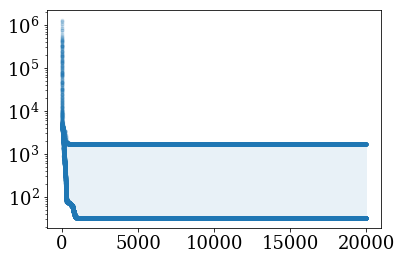

In [80]:
plt.plot(mcmc['step'], mcmc['chi'] / np.size(lcbest['f1']), marker='.', alpha=0.1)
plt.yscale("log")

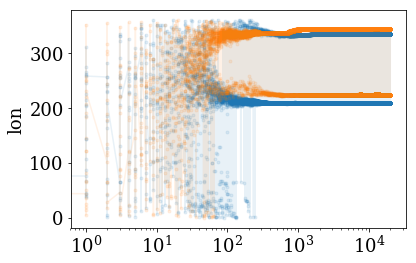

In [81]:
plt.plot(mcmc['step'], mcmc['lon1']* 180/np.pi, marker='.', linestyle=None, alpha=0.1)
plt.plot(mcmc['step'], mcmc['lon2']* 180/np.pi, marker='.', linestyle=None, alpha=0.1)
plt.ylabel('lon')
plt.xscale('log')

In [82]:
ok = np.where((mcmc['step'] > 2000))[0]

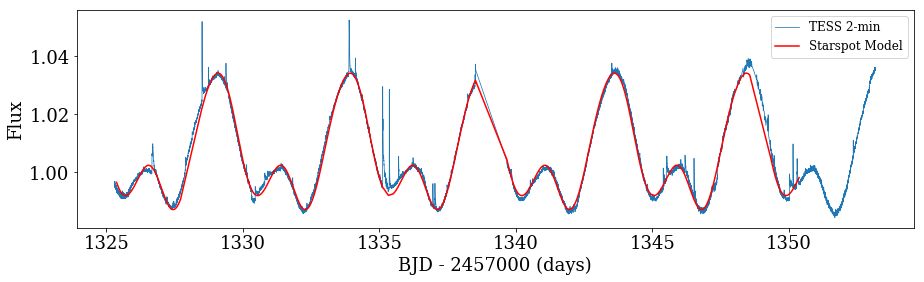

In [83]:
plt.figure(figsize=(15,4))
plt.plot(tbl['TIME'][AOK], tbl['PDCSAP_FLUX'][AOK]/med, lw=0.75, 
         label='TESS 2-min', rasterized=True)
plt.ylabel('Flux');
plt.xlabel('BJD - 2457000 (days)');

plt.plot(lcbest['time'], lcbest['model'], c='r', 
         label='Starspot Model', rasterized=True)
plt.legend(fontsize=12)
plt.savefig('lc_model.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

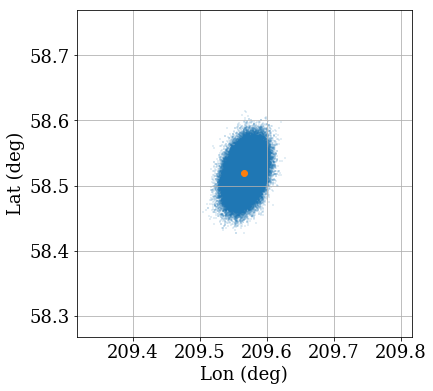

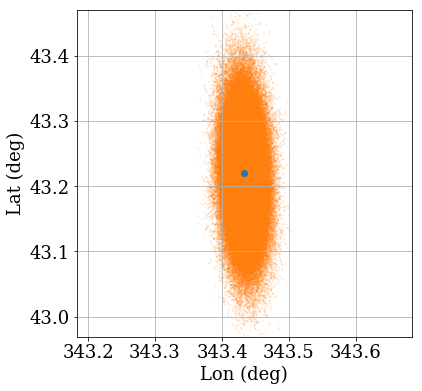

In [84]:
ds = 0.25

plt.figure(figsize=(6,6))
plt.scatter(mcmc['lon1'][ok]* 180/np.pi, 90-(mcmc['lat1'][ok])* 180/np.pi, marker=',', alpha=0.1, s=1, rasterized=True)

plt.scatter(pbest['c'][10], 90-pbest['c'][9], c='C1', rasterized=True)

plt.xlim(pbest['c'][10]-ds, pbest['c'][10]+ds)
plt.ylim(90-pbest['c'][9]-ds, 90-pbest['c'][9]+ds)
plt.xlabel('Lon (deg)')
plt.ylabel('Lat (deg)')
plt.grid(True)

plt.savefig('spot1.pdf', dpi=450, bbox_inches='tight', pad_inches=0.25, rasterized=True)



plt.figure(figsize=(6,6))
plt.scatter(mcmc['lon2'][ok]* 180/np.pi, 90-(mcmc['lat2'][ok])* 180/np.pi, marker=',', alpha=0.1, s=1, c='C1', rasterized=True)

plt.scatter(pbest['c'][13], 90-pbest['c'][12], c='C0', rasterized=True)
 
plt.xlim(pbest['c'][13]-ds, pbest['c'][13]+ds)
plt.ylim(90-pbest['c'][12]-ds, 90-pbest['c'][12]+ds)
plt.xlabel('Lon (deg)')
plt.ylabel('Lat (deg)')
plt.grid(True)

plt.savefig('spot2.pdf', dpi=450, bbox_inches='tight', pad_inches=0.25, rasterized=True)

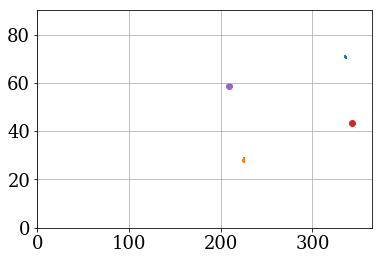

In [89]:
plt.scatter(mcmc['lon1'][ok]* 180/np.pi, np.abs(90-(mcmc['lat1'][ok])* 180/np.pi), 
            marker=',', alpha=0.1, s=1, rasterized=True)
plt.scatter(mcmc['lon2'][ok]* 180/np.pi, np.abs(90-(mcmc['lat2'][ok])* 180/np.pi), marker=',', alpha=0.1, s=1, c='C1', rasterized=True)
plt.scatter(pbest['c'][10], 90-pbest['c'][9], c='C4', rasterized=True)
plt.scatter(pbest['c'][13], 90-pbest['c'][12], c='C3', rasterized=True)

plt.xlim(0,365)
plt.ylim(0,90)
plt.grid(True)